In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [16]:
de = pd.read_csv('./1k_10k_100k/results_delete_1.csv')
fi = pd.read_csv('./1k_10k_100k/results_find_r_1.csv')
ins = pd.read_csv('./1k_10k_100k/results_insert_1.csv')
up = pd.read_csv('./1k_10k_100k/results_read_1.csv')
re = pd.read_csv('./1k_10k_100k/results_update_1.csv')

upm = pd.read_csv('./1k_10k_100k/results_update_many_1.csv')
insm = pd.read_csv('./1k_10k_100k/results_ins_many_1.csv')
dem = pd.read_csv('./1k_10k_100k/results_delete_many_1.csv')

In [4]:
csvs = {'Delete':de, 'Find & replace':fi, 'Insert':ins, 'Update':up, 'Read':re}
mult = [upm, insm, dem]

In [5]:
for name, e in csvs.items():
    csvs[name] = e.drop(columns=['num_records'])*1000

In [6]:
csvs['Delete']

,1000_records,10000_records,100000_records
0,0.369533,0.775446,4.239100
1,0.323312,0.711050,4.005279
2,0.328855,0.716725,4.015096
3,0.311050,0.719458,3.988221
4,0.310846,0.721062,4.017404
...,...,...,...
99995,NaN,NaN,2.143717
99996,NaN,NaN,2.105258
99997,NaN,NaN,2.115987
99998,NaN,NaN,2.106742


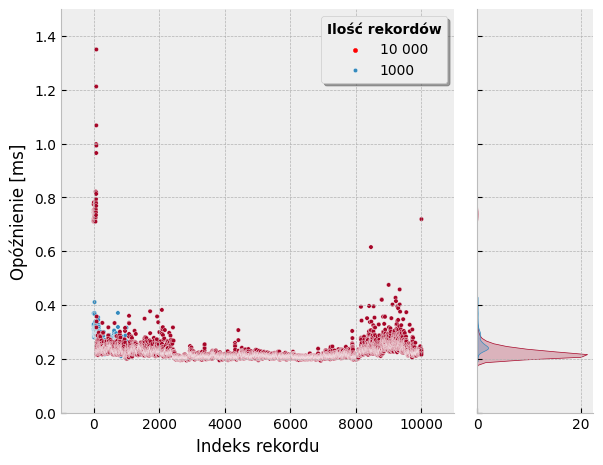

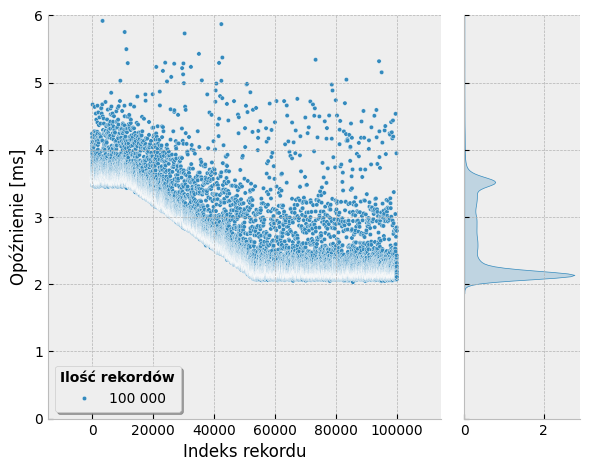

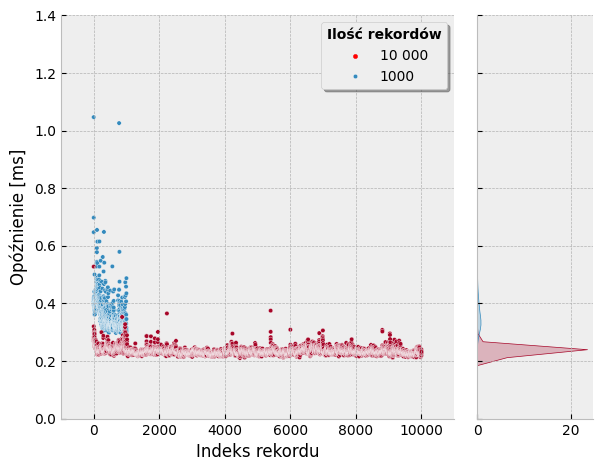

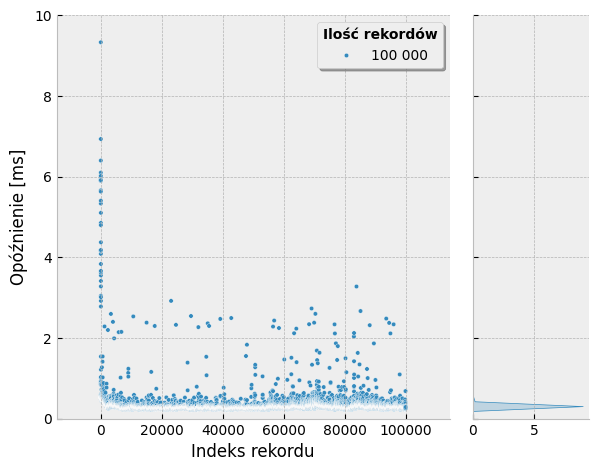

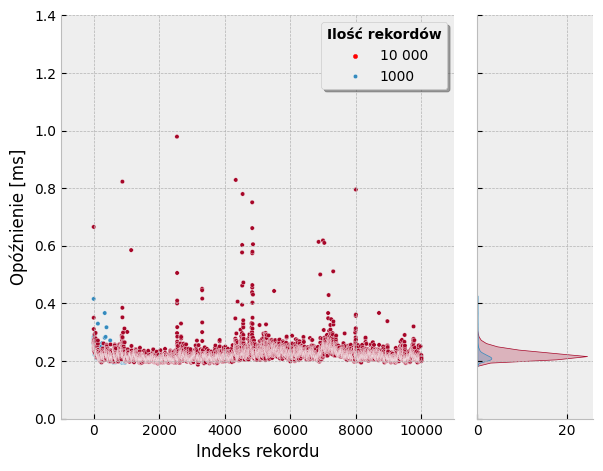

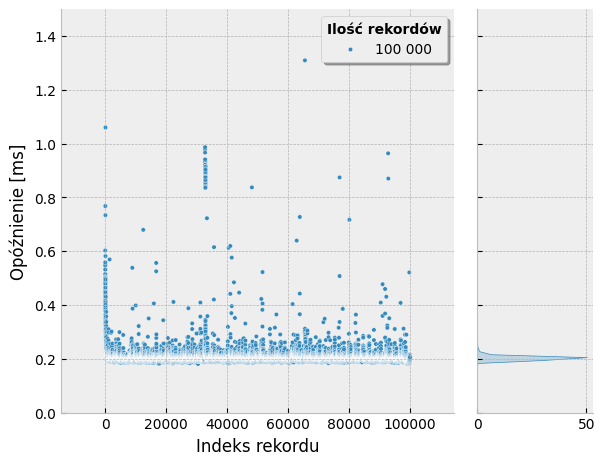

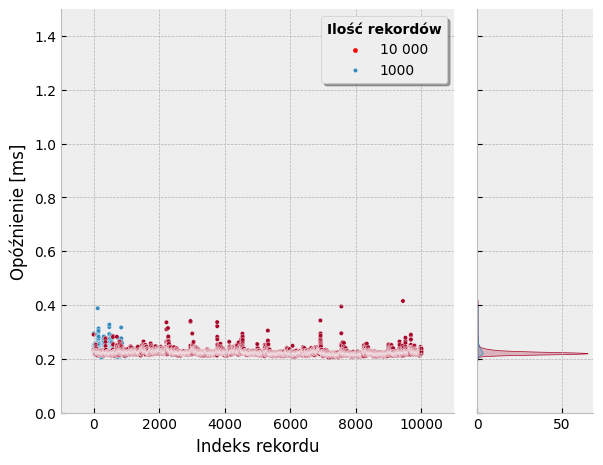

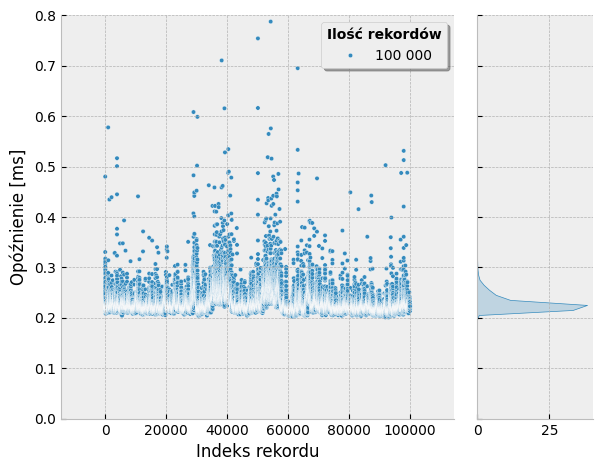

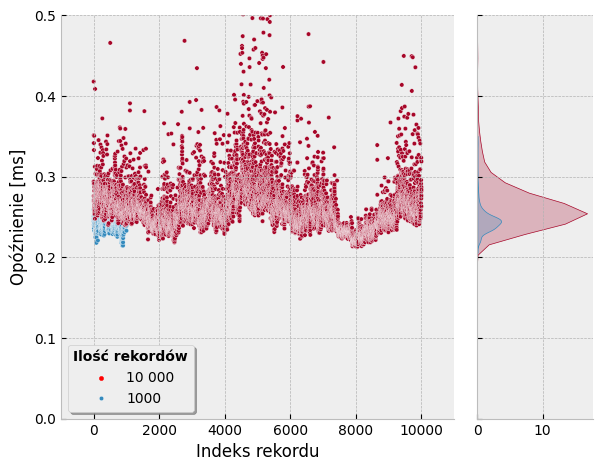

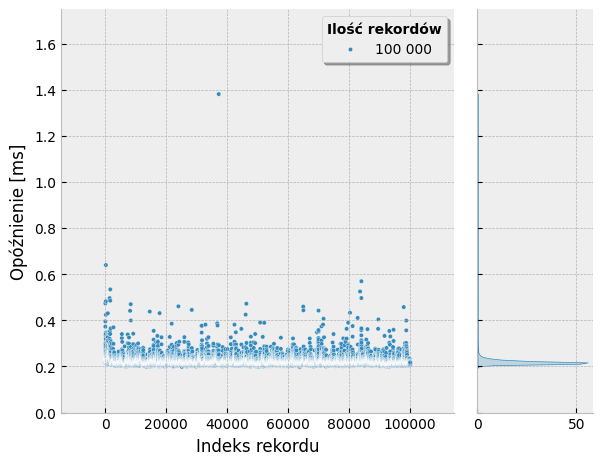

In [11]:
lims = [[1.5, 6],         # Delete
        [1.4, 10],        # Find & replace
        [1.4, 1.5],       # Insert
        [1.5, 0.8],       # Update
        [0.5, 1.75]       # Read
        ]
recs = [['1000_records', '10000_records'], ['100000_records']]
labels = ['10 000','1000','100 000']

plt.style.use('bmh')
for [name, e], limy in zip(csvs.items(), lims):
    # Plot for recs[0]
    g = sns.jointplot(data=e[recs[0]], marginal_ticks=True, s=10, ratio=3,rasterized=True)
    g.ax_marg_x.remove()
    #plt.title(f'{name} operation latency by record volume')
    g.set_axis_labels('Indeks rekordu', 'Opóźnienie [ms]')
    plt.legend(title='Ilość rekordów', fancybox=True, shadow=True, title_fontproperties={'weight': 'bold'}, labels=labels[:2])
    ax = plt.gca()
    leg = ax.get_legend()
    leg.legend_handles[0].set_color('red')
    plt.xlim([-1000, 11000])
    plt.ylim([0, limy[0]])
    g.savefig(f'./{name}1k_10k.svg',bbox_inches="tight",dpi=300)

    # Plot for recs[1]
    g = sns.jointplot(data=e[recs[1]], marginal_ticks=True, s=10, ratio=3,rasterized=True)
    g.ax_marg_x.remove()
    #plt.title(f'{name} operation latency by record volume')
    g.set_axis_labels('Indeks rekordu', 'Opóźnienie [ms]')
    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(title='Ilość rekordów', fancybox=True, shadow=True, title_fontproperties={'weight': 'bold'},
               handles = handles, labels = ['100 000'])
    plt.ylim([0, limy[1]])
    g.savefig(f'./{name}100k.svg',bbox_inches="tight",dpi=300)

    plt.show()